# Lecture03

## Regression Trees

### CIS432 Machine Learning for Business Analytics


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
# Load and visualize a toy dataset
df = pd.read_csv('https://drive.google.com/uc?id=1X5Pxu_RCsYnFbKLVLt3QOzACR0TStGrI&export=download', index_col=0)
print(df.head(), '\n', df.shape)

                  Years  Hits  Salary
Name                                 
Alan Ashby           14    81   475.0
Alvin Davis           3   130   480.0
Andre Dawson         11   141   500.0
Andres Galarraga      2    87    91.5
Alfredo Griffin      11   169   750.0 
 (5, 3)


In [ ]:
# Prepare data matrix
X = df[['Years','Hits']]
Y = df['Salary']

In [ ]:
# Train a regression tree
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=1) # create a DT of depth 1
clf = clf.fit(X, Y)

NameError: name 'X' is not defined

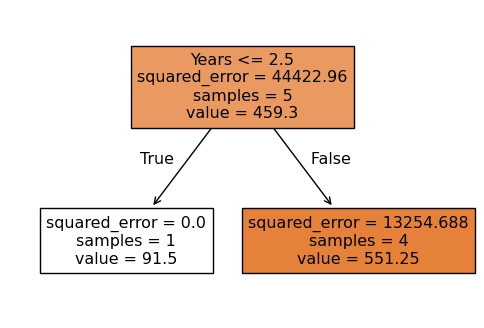

In [ ]:
# Plot the tree
plt.figure(figsize=(6, 4))
tree.plot_tree(clf, feature_names=X.columns, filled=True);

# Save the plot as a PNG file
plt.savefig("regression_tree.png", dpi=300)

### Validate the results


In [ ]:
# Root tree prediction
Y.mean()

459.3

In [ ]:
# Root tree error (MSE)
from sklearn.metrics import mean_squared_error
print('Training MSE (mean squared error):', mean_squared_error(Y, np.ones(5)*Y.mean()))

Training MSE (mean squared error): 44422.96


In [ ]:
# Decision stump predictions
df['Salary_pred'] = clf.predict(X)
df

,Years,Hits,Salary,Salary_pred
Name,,,,
Alan Ashby,14,81,475.0,551.25
Alvin Davis,3,130,480.0,551.25
Andre Dawson,11,141,500.0,551.25
Andres Galarraga,2,87,91.5,91.50
Alfredo Griffin,11,169,750.0,551.25


In [ ]:
# Manually compute left child predictions and accuracy
left_child_observations = X['Years'] <= 2.5
left_child_observations_num = sum(left_child_observations)
left_child_prediction = Y.loc[left_child_observations].mean()
left_child_MSE = mean_squared_error(Y.loc[left_child_observations], np.ones(left_child_observations_num)*left_child_prediction)
print(df.loc[left_child_observations],'\n')
print('Left child observations number:', left_child_observations_num)
print('Left child predictions:', left_child_prediction)
print('Left child MSE:', left_child_MSE)

                  Years  Hits  Salary  Salary_pred
Name                                              
Andres Galarraga      2    87    91.5         91.5 

Left child observations number: 1
Left child predictions: 91.5
Left child MSE: 0.0


In [ ]:
# Manually compute right child predictions
right_child_observations = X['Years'] > 2.5
right_child_observations_num = sum(right_child_observations)
right_child_prediction = Y.loc[right_child_observations].mean()
right_child_MSE = mean_squared_error(Y.loc[right_child_observations], np.ones(right_child_observations_num)*right_child_prediction)
print(df.loc[right_child_observations],'\n')
print('Right child observations number:', right_child_observations_num)
print('Right child predictions:', right_child_prediction)
print('Right child MSE:', right_child_MSE)

                 Years  Hits  Salary  Salary_pred
Name                                             
Alan Ashby          14    81   475.0       551.25
Alvin Davis          3   130   480.0       551.25
Andre Dawson        11   141   500.0       551.25
Alfredo Griffin     11   169   750.0       551.25 

Right child observations number: 4
Right child predictions: 551.25
Right child MSE: 13254.6875


In [ ]:
# Overall MSE
print('Overall MSE (using model predictions):', mean_squared_error(Y, df['Salary_pred']))
print('Overall MSE (manually computed):', (left_child_MSE+4*right_child_MSE)/5)

Overall MSE (using model predictions): 10603.75
Overall MSE (manually computed): 10603.75


Return to presentation